In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from data_preprocessing import get_X_y
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score



In [2]:
X, y = get_X_y()
X.head()
df = pd.DataFrame(X,y)
df.shape
X.columns
df.head()

,year,length_ft,beam_ft,numEngines,totalHP,created_month,created_year,type_power,type_sail,boatClass_power-aft,...,zip_98362,zip_98382,zip_98402,zip_98408,zip_98501,zip_98502,zip_98516,zip_99336,zip_99501,zip_99508
price,,,,,,,,,,,,,,,,,,,,,
16500.0,0.459576,-0.800811,-0.652886,-0.384842,-0.620622,-0.020429,0.669316,True,False,False,...,False,False,False,False,False,False,False,False,False,False
539000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=0)


## Random Forest


         best B = {'n_estimators': 110}
  validation R2 = 0.859


<Axes: xlabel='trees'>

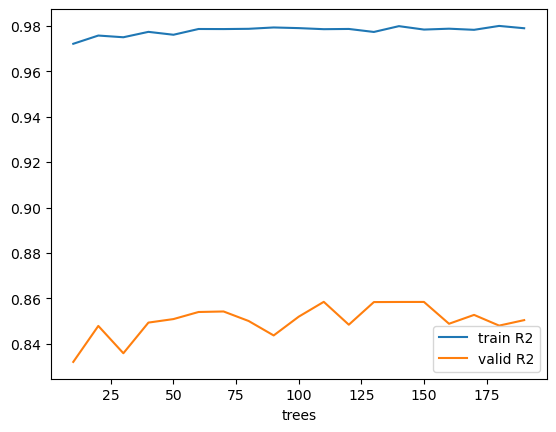

In [4]:
# cross-validate to determine optimal depth
B = np.arange(10,200,10)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(X_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])

In [6]:
# test R2
print('test R2',rfCV.score(X_test,y_test).round(3))

test R2 0.822


## Gradient Boosting Regressor

In [5]:
grid = {'learning_rate':[0.01, 0.1,1],'n_estimators':[100,2000],'max_depth':[1,2,3]}

bgt = GradientBoostingRegressor()
gbtCV = GridSearchCV(bgt,param_grid=grid,n_jobs=-1)
gbtCV.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3], 'n_estimators': [100, 2000]})

In [6]:
print('Gradient Boosting Trees:')
print('    Optimal Parameters:',gbtCV.best_params_)
print('    Optimal Valid R2=',gbtCV.best_score_.round(3))
print('    Optimal Test R2=', gbtCV.score(X_test,y_test))

Gradient Boosting Trees:
    Optimal Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 2000}
    Optimal Valid R2= 0.888
    Optimal Test R2= 0.8172661507235408


In [8]:
grid = {'learning_rate':[ 0.1],'n_estimators':[100,2000],'max_depth':np.arange(3,10,1)}

bgt = GradientBoostingRegressor()
gbtCV = GridSearchCV(bgt,param_grid=grid,n_jobs=-1)
gbtCV.fit(X_train,y_train)
print('Gradient Boosting Trees:')
print('    Optimal Parameters:',gbtCV.best_params_)
print('    Optimal Valid R2=',gbtCV.best_score_.round(3))
print('    Optimal Test R2=', gbtCV.score(X_test,y_test))

Gradient Boosting Trees:
    Optimal Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 2000}
    Optimal Valid R2= 0.89
    Optimal Test R2= 0.8210509704670247
